In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import data
# CSV_FILE = 'static/df_non_temporal_imputed1.csv'
CSV_FILE = 'static/df_non_temporal_unnormed.csv'
# CSV_FILE = 'static/df_non_temporal.csv'
df = pd.read_csv(CSV_FILE)
print(df.head())

   Unnamed: 0       id        date  mood_class  average_mood  \
0           5  AS14.01  2014-03-26           2           6.6   
1           6  AS14.01  2014-03-27           3           7.0   
2           7  AS14.01  2014-03-28           1           6.4   
3           8  AS14.01  2014-03-29           5           8.0   
4           9  AS14.01  2014-03-30           4           7.5   

   last_5day_average_mood  last_5day_average_arousal  \
0                    6.43                       0.46   
1                    6.51                       0.38   
2                    6.63                       0.30   
3                    6.55                       0.14   
4                    6.95                       0.02   

   last_5day_average_valence  last_5day_average_activity  last_5day_total_sms  \
0                       0.40                    0.138201                  0.4   
1                       0.48                    0.131653                  0.4   
2                       0.54       

MSE:  0.37800570681916207 r_score:  0.31125097439662985 MAE:  0.42988705558195944 MAPE 0.06722230668704829
MSE:  0.378634277672159 r_score:  0.31010568067562416 MAE:  0.43452154626109013 MAPE 0.0677630226513834


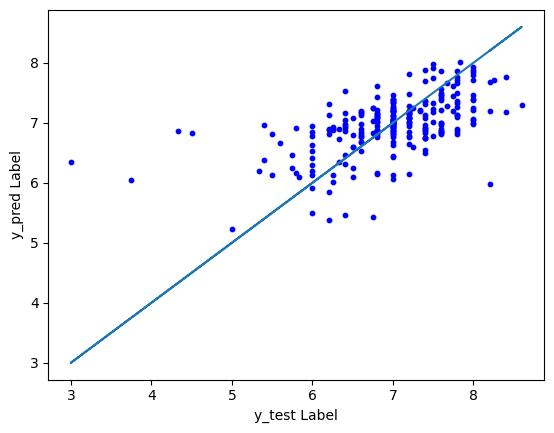

In [17]:
from sklearn.metrics import r2_score
#Split data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X = df.iloc[:, np.arange(5,len(df.columns)).tolist()]
t = df['average_mood']

X_train, X_test, y_train, y_test = train_test_split(X, t, test_size = 0.25, random_state = 32)

#Initiate model
# parameters = {
#     'n_estimators': [100, 150, 200, 250, 300],
#     'max_depth': [1,2,3,4,5],
# }
# regr = RandomForestRegressor(random_state=0)
#
# clf = GridSearchCV(regr, parameters)
# clf.fit(X_train, y_train)


rf = RandomForestRegressor(max_depth=2, n_estimators=250, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
r_score  = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("MSE: ", MSE,"r_score: ", r_score, "MAE: ", MAE, "MAPE", MAPE)
print("=="*30)
rf_base = RandomForestRegressor(random_state=0)
rf_base.fit(X_train, y_train)
y_pred = rf_base.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
r_score  = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("MSE: ", MSE,"r_score: ", r_score, "MAE: ", MAE, "MAPE", MAPE)

plt.scatter(y_test, y_pred, color='blue', label='Data Points', s=10)
plt.ylabel('y_pred Label')
plt.xlabel('y_test Label')
plt.plot(y_test, y_test)

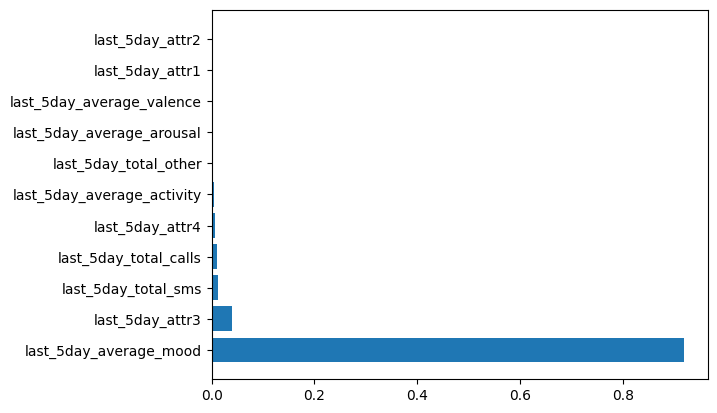

In [8]:
#Feature importance
feature_importance = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

fig = plt.figure()
plt.barh(feature_importance.index, feature_importance.importance)
# If you want to define your own labels,
# change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), indices)
#plt.ylim([-1, X.shape[1]])
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

X = df.iloc[:, np.arange(5,len(df.columns)).tolist()]
y = df['mood_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 32)

# rf = RandomForestClassifier(n_estimators = 100, random_state = 32)
#
# param_grid = {
#     'n_estimators': [200, 300, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }
#
# CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)
# CV_rfc.best_params_

rfc=RandomForestClassifier(random_state=42, max_features='sqrt',
                           n_estimators= 500, max_depth=6, criterion='entropy')
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
confusion_hard = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
#
rfc_base=RandomForestClassifier(random_state=42)
rfc_base.fit(X_train, y_train)
y_pred=rfc_base.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.48      0.58      0.53        52
           2       0.28      0.11      0.16        45
           3       0.51      0.33      0.40        55
           4       0.23      0.42      0.30        53
           5       0.58      0.53      0.56        58

    accuracy                           0.40       263
   macro avg       0.42      0.39      0.39       263
weighted avg       0.43      0.40      0.40       263

              precision    recall  f1-score   support

           1       0.49      0.52      0.50        52
           2       0.21      0.13      0.16        45
           3       0.46      0.35      0.40        55
           4       0.25      0.36      0.29        53
           5       0.45      0.48      0.47        58

    accuracy                           0.38       263
   macro avg       0.37      0.37      0.36       263
weighted avg       0.38      0.38      0.37       263



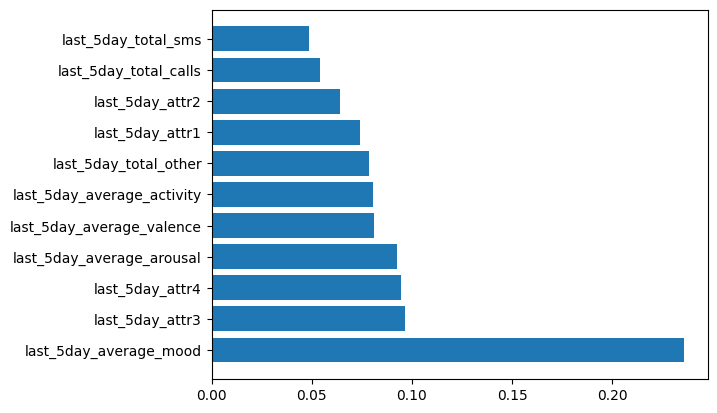

In [10]:
#Feature importance
feature_importance = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

fig = plt.figure()
plt.barh(feature_importance.index, feature_importance.importance)
# If you want to define your own labels,
# change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), indices)
#plt.ylim([-1, X.shape[1]])
plt.show()